In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchsummary import summary
from tqdm import tqdm
from nanopore_dataset import create_sample_map
from nanopore_dataset import create_splits
from nanopore_dataset import load_csv
from nanopore_dataset import NanoporeDataset

from resnet1d import ResNet1D
import seaborn as sns

In [148]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

In [152]:
model = ResNet1D(
            in_channels=1,
            base_filters=128,
            kernel_size=3,
            stride=2,
            groups=1,
            n_block=8,
            n_classes=2,
            downsample_gap=2,
            increasefilter_gap=4,
            use_do=False)

summary(model, (1, 400), device= device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [-1, 128, 400]             512
   MyConv1dPadSame-2             [-1, 128, 400]               0
       BatchNorm1d-3             [-1, 128, 400]             256
              ReLU-4             [-1, 128, 400]               0
            Conv1d-5             [-1, 128, 400]          49,280
   MyConv1dPadSame-6             [-1, 128, 400]               0
       BatchNorm1d-7             [-1, 128, 400]             256
              ReLU-8             [-1, 128, 400]               0
            Conv1d-9             [-1, 128, 400]          49,280
  MyConv1dPadSame-10             [-1, 128, 400]               0
       BasicBlock-11             [-1, 128, 400]               0
      BatchNorm1d-12             [-1, 128, 400]             256
             ReLU-13             [-1, 128, 400]               0
           Conv1d-14             [-1, 1

In [154]:
MESMLR_FN = './nanopore_classification/best_models/mesmlr_resnet1d.pt'
ADDSEQ_FN = './nanopore_classification/best_models/addseq_resnet1d.pt'

weights_path = ADDSEQ_FN
model.load_state_dict(torch.load(weights_path, map_location=torch.device(device)))
model.to(device)
model.eval()

ResNet1D(
  (first_block_conv): MyConv1dPadSame(
    (conv): Conv1d(1, 128, kernel_size=(3,), stride=(1,))
  )
  (first_block_bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (first_block_relu): ReLU()
  (basicblock_list): ModuleList(
    (0): BasicBlock(
      (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU()
      (do1): Dropout(p=0.5, inplace=False)
      (conv1): MyConv1dPadSame(
        (conv): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
      )
      (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU()
      (do2): Dropout(p=0.5, inplace=False)
      (conv2): MyConv1dPadSame(
        (conv): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
      )
      (max_pool): MyMaxPool1dPadSame(
        (max_pool): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
      )
    )
    (1): BasicBlock(
      (bn1)

1.0
1.0
1.0
1.0
1.0


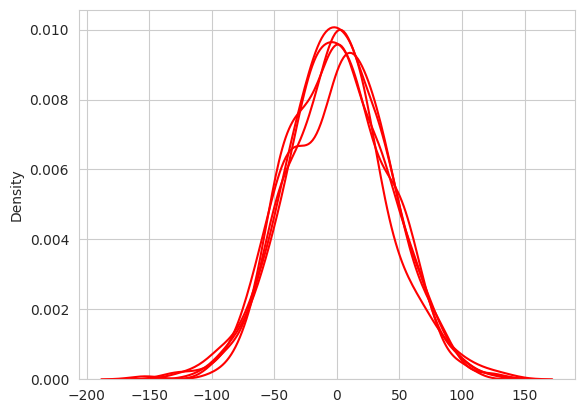

In [47]:
# Make predictions on random sequeces
mean = torch.zeros((1, 1, 400)) + 0 # Mean
std = torch.zeros((1, 1, 400)) + 40 # Spread

set_predict = {}
for i in range(5):
    dummy_sequence = torch.normal(mean, std).to(device)
    seq = dummy_sequence.reshape(-1,)
    prediction = model(dummy_sequence).sigmoid().round().item()
    print(prediction)
    set_predict[seq] = prediction
    sns.set_style('whitegrid')
    col = "grey"
    if prediction == 1.0:
        col = "red"
    sns.kdeplot(np.array(seq), label= prediction, color= col)
#     sns.ecdfplot(np.array(seq), label= prediction, color= col)

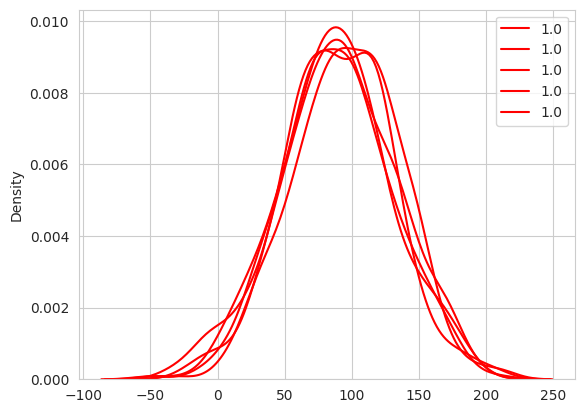

In [10]:
for seq in set_predict.keys():
    prediction = set_predict[seq]
    col = "grey"
    if prediction == 1.0:
        col = "red"
    sns.kdeplot(np.array(seq), label= prediction, color= col)
#     sns.displot(np.array(seq), label= prediction, color= col)
    plt.legend()

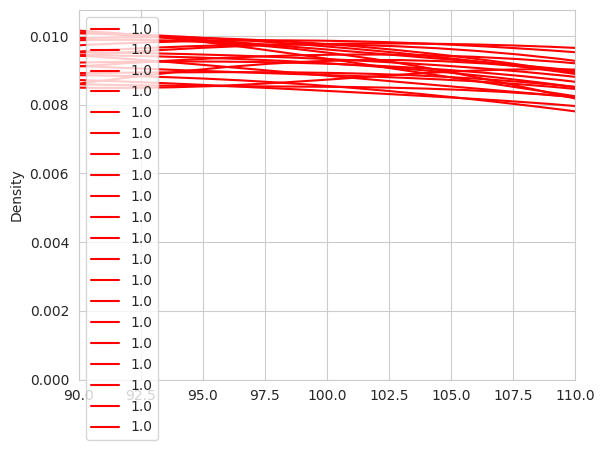

In [417]:
for seq in set_predict.keys():
    prediction = set_predict[seq]
    col = "grey"
    if prediction == 1.0:
        col = "red"
    plt.xlim(90, 110)
    sns.kdeplot(np.array(seq), label= prediction, color= col)
#     sns.displot(np.array(seq), label= prediction, color= col)
    plt.legend()

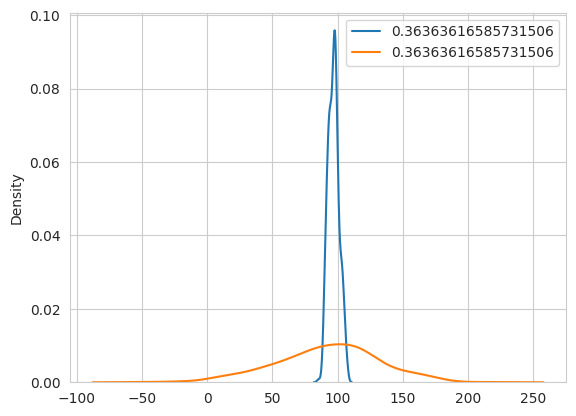

In [213]:
# mean = torch.zeros((1, 1, 400)) + 90 # Mean
# std = torch.zeros((1, 1, 400)) + 40 # Spread
# input_tensor = torch.normal(mean, std).to(device)

# prediction = model(bad_case).sigmoid().item()

sns.kdeplot(np.array(input_tensor.reshape(-1,)), label= prediction)
sns.kdeplot(np.array(.reshape(-1,)), label= prediction)
plt.legend()
plt.show()


# print(prediction)

100%|███████████████████████████████████████| 1000/1000 [01:54<00:00,  8.73it/s]


[0.10304654389619827, 0.10555486381053925, 0.1079835593700409, 0.1095346212387085, 0.11250969767570496, 0.11459165811538696, 0.11645134538412094, 0.11928670853376389, 0.12146744877099991, 0.12250572443008423, 0.12270283699035645, 0.12286124378442764, 0.12313196063041687, 0.12362714111804962, 0.12462996691465378, 0.1249893307685852, 0.1281536966562271, 0.1289961338043213, 0.12911246716976166, 0.12920083105564117, 0.12936700880527496, 0.12947236001491547, 0.12951268255710602, 0.12972129881381989, 0.13011880218982697, 0.13089974224567413, 0.13160280883312225, 0.13361041247844696, 0.13457445800304413, 0.13565625250339508, 0.1362639218568802, 0.13654255867004395, 0.13739459216594696, 0.13793115317821503, 0.1387164145708084, 0.13940279185771942, 0.13948838412761688, 0.13950161635875702, 0.14014333486557007, 0.14078976213932037, 0.1409066617488861, 0.14096328616142273, 0.1422187089920044, 0.14384688436985016, 0.1443919837474823, 0.14460666477680206, 0.14463786780834198, 0.14480501413345337, 0

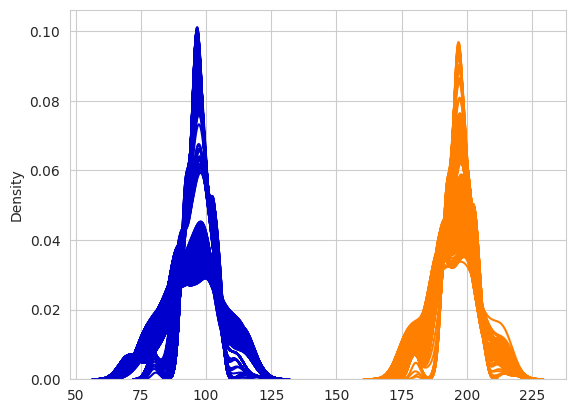

In [230]:
input_len = 400
n_predictions = 1000

input_tensor = torch.zeros((1, 1, 400)).to(device)
sequence_tensor = torch.tensor(addseq_pos[0])
predictions=[]

for i in tqdm(range(n_predictions)):
    input_tensor[:, :, :] = sequence_tensor[i:i+input_len]
    prediction = model(input_tensor).sigmoid().item()
    predictions.append(prediction)
    
    seq = input_tensor.reshape(-1,)
    col = (0, 0, 0.8, 0.5)
    if prediction > 0.5:
        seq += 100
        col = (1, 0.5, 0, 0.5)
        
    sns.kdeplot(np.array(seq), label= prediction, color = col)

predictions.sort()
print(predictions)

100%|███████████████████████████████████████| 1000/1000 [01:56<00:00,  8.56it/s]


[0.34333792328834534, 0.3459360599517822, 0.3478778898715973, 0.3481314778327942, 0.3516562581062317, 0.3531676232814789, 0.36021092534065247, 0.3605031669139862, 0.3612061142921448, 0.36315226554870605, 0.36421817541122437, 0.3667374551296234, 0.369963675737381, 0.3749542832374573, 0.3758339583873749, 0.3762974441051483, 0.3769517242908478, 0.3788585960865021, 0.38009339570999146, 0.38434359431266785, 0.3852725923061371, 0.38545480370521545, 0.38605400919914246, 0.3888249695301056, 0.38912785053253174, 0.3904229998588562, 0.3913814127445221, 0.3930349349975586, 0.3936634361743927, 0.39905425906181335, 0.3998480439186096, 0.3999177813529968, 0.40018394589424133, 0.400448203086853, 0.40145763754844666, 0.4019087553024292, 0.40236905217170715, 0.40278753638267517, 0.40287211537361145, 0.4044751226902008, 0.4055081605911255, 0.4060821533203125, 0.4075547754764557, 0.407587468624115, 0.4076642692089081, 0.40940365195274353, 0.4098165035247803, 0.41032102704048157, 0.41089585423469543, 0.41

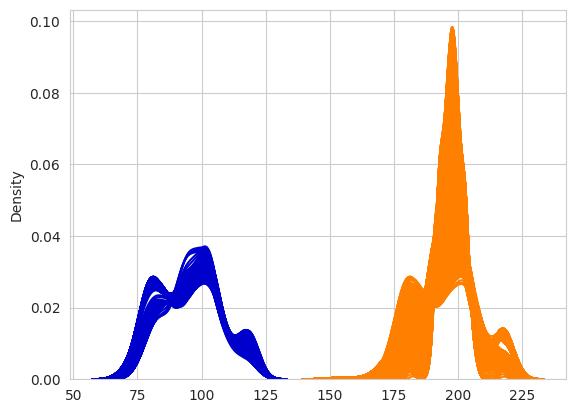

In [229]:
input_len = 400
n_predictions = 1000

input_tensor = torch.zeros((1, 1, 400)).to(device)
sequence_tensor = torch.tensor(addseq_pos[1])
predictions=[]

for i in tqdm(range(n_predictions)):
    input_tensor[:, :, :] = sequence_tensor[i:i+input_len]
    prediction = model(input_tensor).sigmoid().item()
    predictions.append(prediction)
    
    seq = input_tensor.reshape(-1,)
    col = (0, 0, 0.8, 0.5)
    if prediction > 0.5:
        seq += 100
        col = (1, 0.5, 0, 0.5)
        
    sns.kdeplot(np.array(seq), label= prediction, color = col)

predictions.sort()
print(predictions)

<AxesSubplot:ylabel='Density'>

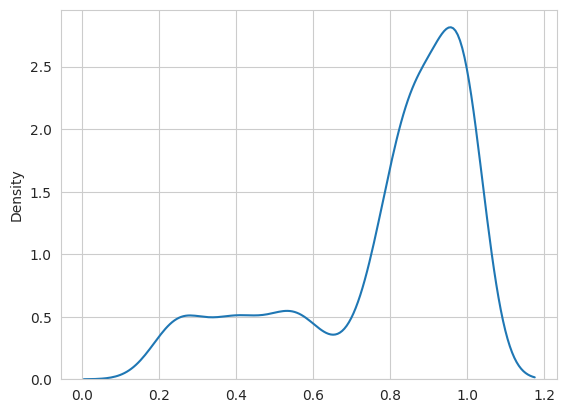

In [194]:
sns.kdeplot(predictions, label= 'normal')

In [130]:
sequence_ctr_0 = addseq_neg[0]
sequence_tr_0 = addseq_pos[0]

sequence_ctr_1 = addseq_neg[1]
sequence_tr_1 = addseq_pos[1]

sequence_ctr_2 = addseq_neg[2]
sequence_tr_2 = addseq_pos[2]

sequence_ctr_3 = addseq_neg[3]
sequence_tr_3 = addseq_pos[3]

sequence_ctr_4 = addseq_neg[4]
sequence_tr_4 = addseq_pos[4]

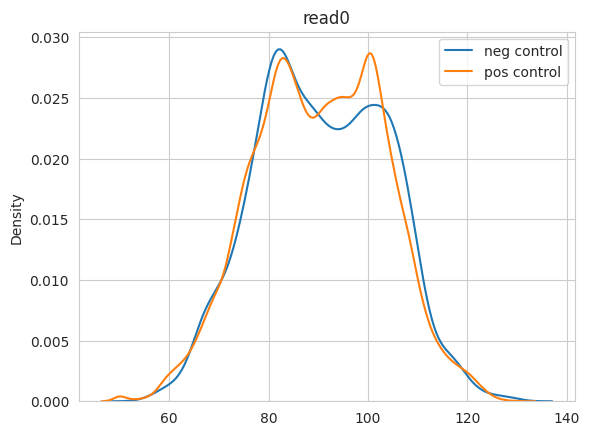

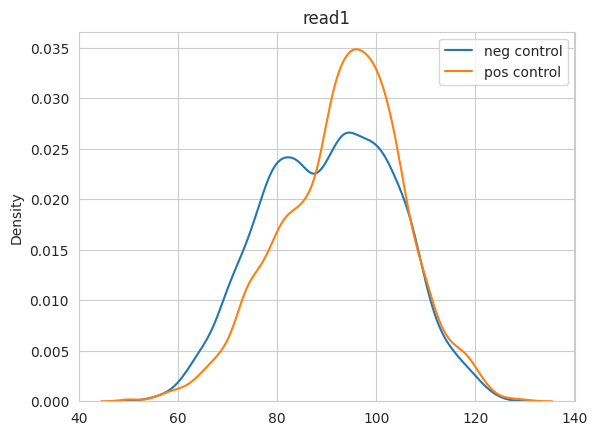

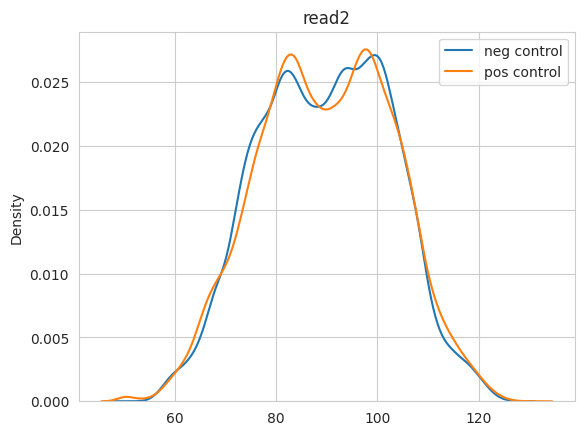

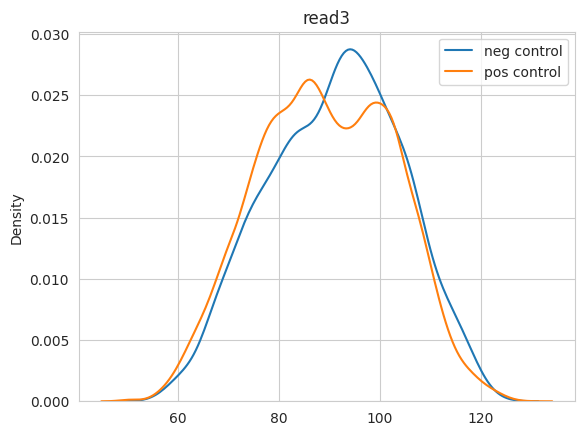

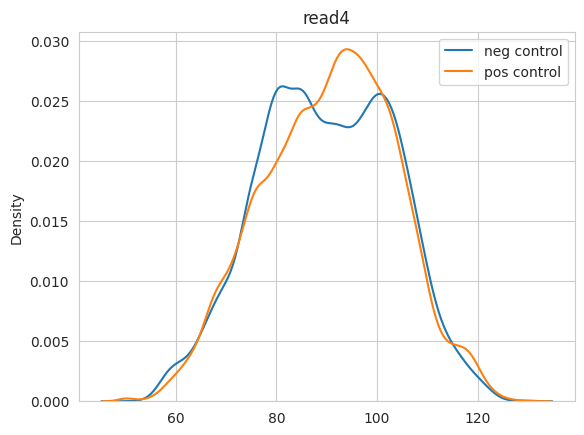

In [393]:
seq = []
for i in range(5):
    neg = addseq_neg[i]
    pos = addseq_pos[i]
    seq.append((neg, pos))
    sns.kdeplot(np.array(neg), label= "neg control")
    sns.kdeplot(np.array(pos), label= "pos control")
    plt.legend()
    plt.title("read" + str(i))
    plt.show()
#     plt.savefig('../results/figures/add_seq_neg_control_reprocessed_density_,'+ str(i) +'.pdf')
    plt.close()

neg signals: [93.3527, 94.0845, 94.9992, 93.5356, 92.072, 94.4504, 94.2674, 100.122, 103.781, 107.806]


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 71.39it/s]


pos signals: [98.1014, 96.9596, 97.9111, 97.9111, 98.1014, 99.0528, 99.0528, 97.9111, 96.579, 95.4372]


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 99.00it/s]


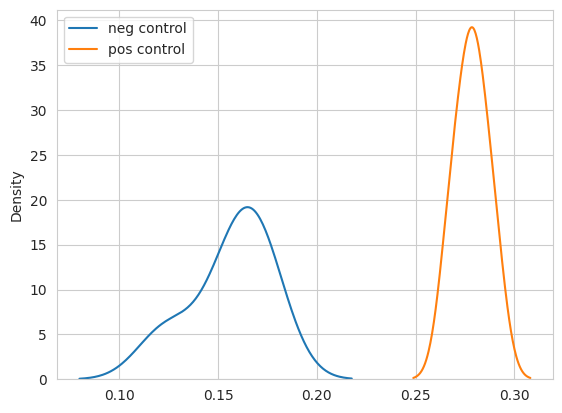

neg signals: [97.5055, 104.713, 103.196, 102.816, 88.4014, 85.3667, 88.7808, 85.7461, 92.7638, 89.7291]


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 54.08it/s]


pos signals: [95.8588, 98.4182, 98.0245, 98.2213, 94.4807, 94.2838, 94.8744, 95.4651, 94.8744, 91.7244]


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 54.51it/s]


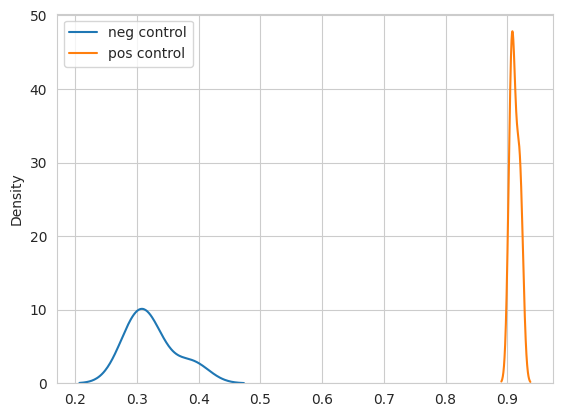

neg signals: [107.42, 109.068, 102.112, 103.576, 99.5491, 83.9901, 84.7222, 85.4544, 85.2714, 84.1731]


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 77.01it/s]


pos signals: [102.951, 100.788, 99.2152, 99.0186, 101.181, 100.592, 85.0578, 85.0578, 84.2713, 85.2544]


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 99.55it/s]


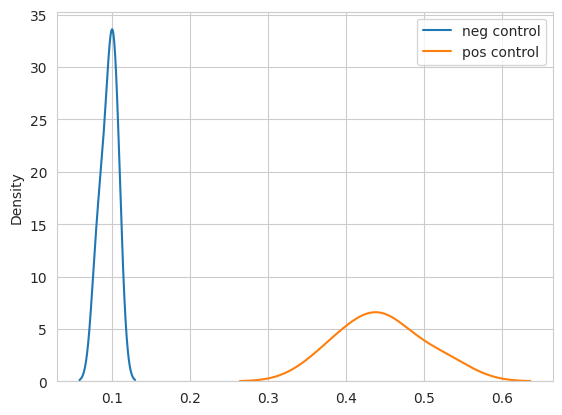

neg signals: [70.3562, 73.0213, 73.0213, 72.2599, 71.1177, 90.3449, 93.0101, 90.1545, 87.8701, 91.8679]


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 59.20it/s]


pos signals: [69.0813, 67.2629, 69.0813, 69.6268, 71.0815, 75.0819, 102.176, 105.085, 105.267, 106.54]


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 78.60it/s]


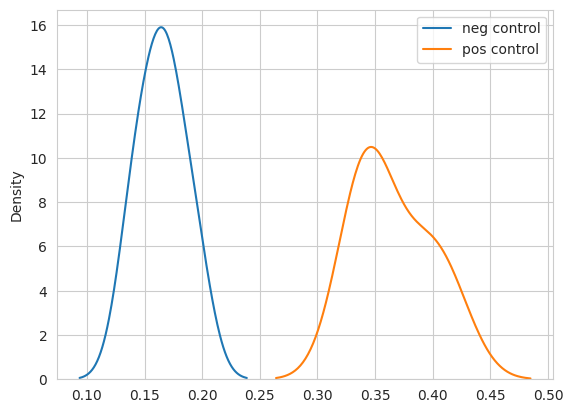

neg signals: [100.014, 98.3964, 100.553, 99.2952, 99.2952, 97.3179, 97.3179, 99.2952, 98.5762, 97.3179]


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 88.86it/s]


pos signals: [93.9655, 94.3506, 95.1207, 93.773, 94.9282, 93.5804, 92.8103, 92.8103, 93.3879, 92.4252]


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 97.90it/s]


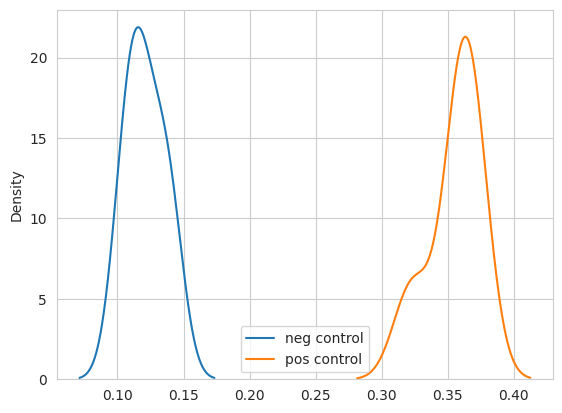

In [395]:
seq = []
for i in range(5):
    neg = addseq_neg[i]
    pos = addseq_pos[i]
    seq.append((neg, pos))
predict = []
count =0
for (seq_neg, seq_pos) in seq:
    print("neg signals:", seq_neg[:10])
    sequence_tensor = torch.tensor(seq_neg)
    # Make predictions on subsequences of length 400
    predictions_neg = []
    input_len = 400
    n_predictions = 5
    input_tensor = torch.zeros((1, 1, 400)).to(device)
    for i in tqdm(range(n_predictions)):
        # Could also batch these to speed up predictions
        input_tensor[:, :, :] = sequence_tensor[i:i+input_len]
        prediction = model(input_tensor).sigmoid().item()
        predictions_neg.append(prediction)
    
    print("pos signals:", seq_pos[:10])
    sequence_tensor = torch.tensor(seq_pos)
    # Make predictions on subsequences of length 400
    predictions_pos = []
    input_len = 400
    n_predictions = 5
    input_tensor = torch.zeros((1, 1, 400)).to(device)
    for i in tqdm(range(n_predictions)):
        # Could also batch these to speed up predictions
        input_tensor[:, :, :] = sequence_tensor[i:i+input_len]
        prediction = model(input_tensor).sigmoid().item()
        predictions_pos.append(prediction)
        
    predict.append((predictions_neg, predictions_pos))
    sns.kdeplot(predictions_neg, label= "neg control")
    sns.kdeplot(predictions_pos, label= "pos control")
    plt.legend()
#     outfig = '../results/figures/test/addseq_predicted_prob_density_' + str(count) + '.pdf'
#     plt.savefig(outfig)
    plt.show()
    plt.close()
    count +=1

neg signals: [93.3527, 94.0845, 94.9992, 93.5356, 92.072, 94.4504, 94.2674, 100.122, 103.781, 107.806]


100%|███████████████████████████████████████| 4552/4552 [00:47<00:00, 96.48it/s]


pos signals: [98.1014, 96.9596, 97.9111, 97.9111, 98.1014, 99.0528, 99.0528, 97.9111, 96.579, 95.4372]


100%|██████████████████████████████████| 138963/138963 [22:21<00:00, 103.62it/s]


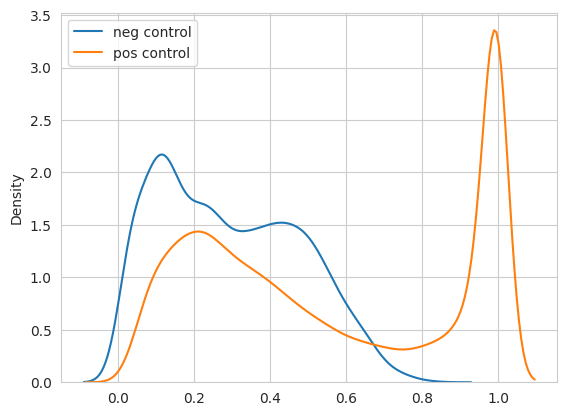

Finished read: 0
neg signals: [97.5055, 104.713, 103.196, 102.816, 88.4014, 85.3667, 88.7808, 85.7461, 92.7638, 89.7291]


100%|█████████████████████████████████████| 11506/11506 [01:55<00:00, 99.43it/s]


pos signals: [95.8588, 98.4182, 98.0245, 98.2213, 94.4807, 94.2838, 94.8744, 95.4651, 94.8744, 91.7244]


100%|████████████████████████████████████| 12803/12803 [02:07<00:00, 100.34it/s]


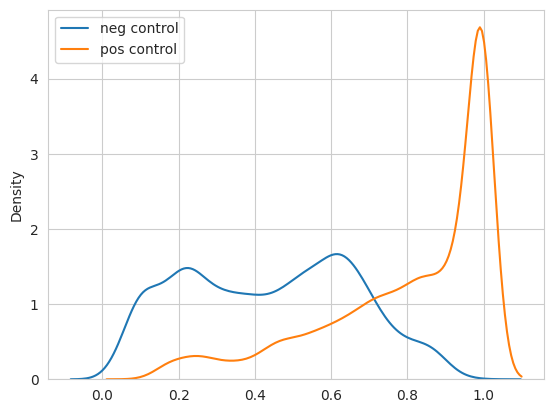

Finished read: 1
neg signals: [107.42, 109.068, 102.112, 103.576, 99.5491, 83.9901, 84.7222, 85.4544, 85.2714, 84.1731]


 18%|██████▏                            | 21611/121490 [03:31<16:19, 101.94it/s]


KeyboardInterrupt: 

In [396]:
predict = []
count =0
for (seq_neg, seq_pos) in seq:
    print("neg signals:", seq_neg[:10])
    sequence_tensor = torch.tensor(seq_neg)
    # Make predictions on subsequences of length 400
    predictions_neg = []
    input_len = 400
    n_predictions = len(seq_neg)-input_len
    input_tensor = torch.zeros((1, 1, 400)).to(device)
    for i in tqdm(range(n_predictions)):
        # Could also batch these to speed up predictions
        input_tensor[:, :, :] = sequence_tensor[i:i+input_len]
        prediction = model(input_tensor).sigmoid().item()
        predictions_neg.append(prediction)
    
    print("pos signals:", seq_pos[:10])
    sequence_tensor = torch.tensor(seq_pos)
    # Make predictions on subsequences of length 400
    predictions_pos = []
    input_len = 400
    n_predictions = len(seq_pos)-input_len
    input_tensor = torch.zeros((1, 1, 400)).to(device)
    for i in tqdm(range(n_predictions)):
        # Could also batch these to speed up predictions
        input_tensor[:, :, :] = sequence_tensor[i:i+input_len]
        prediction = model(input_tensor).sigmoid().item()
        predictions_pos.append(prediction)
        
    predict.append((predictions_neg, predictions_pos))
    sns.kdeplot(predictions_neg, label= "neg control")
    sns.kdeplot(predictions_pos, label= "pos control")
    plt.legend()
#     outfig = '../results/figures/addseq_predicted_prob_density_' + str(count) + '.pdf'
#     plt.savefig(outfig)
    plt.show()
    plt.close()
    print("Finished read:", count)
    count +=1

## Validation

In [173]:
batch_size = 256

neg_fn = '../data/data/addseq/reprocessed-unique.0.eventalign.signal.csv'
pos_fn = '../data/data/addseq/reprocessed-unique.500.eventalign.signal.csv'

min_val = 50 # Used to clip outliers
max_val = 130 # Used to clip outliers

seq_len = 400

print("Preparing unmodified...")
print("Loading csv...")
unmodified_sequences = load_csv(neg_fn,
                                min_val=min_val,
                                max_val=max_val,
                                max_sequences=None)
print("Creating sample map...")
unmodified_sample_map = create_sample_map(unmodified_sequences,
                                          seq_len=seq_len)

print("Creating splits...")
unmodified_train, unmodified_val, unmodified_test = create_splits(
        unmodified_sequences, unmodified_sample_map, seq_len=seq_len, shuffle=False)
print("Prepared.")

print("Preparing modified...")
print("Loading csv...")
modified_sequences = load_csv(pos_fn,
                              min_val=min_val,
                              max_val=max_val,
                              max_sequences=None)
print("Creating sample map...")
modified_sample_map = create_sample_map(modified_sequences,
                                        seq_len=seq_len)
print("Creating splits...")
modified_train, modified_val, modified_test = create_splits(
        modified_sequences, modified_sample_map, seq_len=seq_len, shuffle=False)
print("Prepared.")

Preparing unmodified...
Loading csv...


87090426it [02:54, 500269.66it/s]


Creating sample map...


100%|███████████████████████████████████████| 1318/1318 [01:38<00:00, 13.32it/s]


Creating splits...


100%|██████████████████████████| 86107601/86107601 [01:01<00:00, 1407219.27it/s]


Prepared.
Preparing modified...
Loading csv...


89565238it [03:03, 488054.25it/s]


Creating sample map...


100%|███████████████████████████████████████| 2390/2390 [02:08<00:00, 18.65it/s]


Creating splits...


100%|██████████████████████████| 88556920/88556920 [01:07<00:00, 1306219.57it/s]

Prepared.


In [345]:
val_dataset = NanoporeDataset(unmodified_sequences,
                              unmodified_val,
                              modified_sequences,
                              modified_val,
                              device=device,
                              synthetic=False,
                              seq_len=seq_len)

val_dataloader = DataLoader(val_dataset,
                            batch_size=batch_size,
                            shuffle=True)

In [346]:
val_dataloader = DataLoader(val_dataset,
                            batch_size=20,
                            shuffle=True)

In [347]:
sample = val_set[0][0]
label = val_set[0][1]
pred = model(sample).sigmoid()


IndexError: list index out of range

In [354]:
val_set = []
predicted = {0:[], 1:[]}
count = 0
for samples, labels in tqdm(val_dataloader):
    while count <= 20:
        pred = model(samples).sigmoid()
        for i in range(len(pred)):
            label = labels[i].item()
            predicted[label].append(pred[i].item())
        count +=1
        print(count)
    break

  0%|                                               | 0/1710231 [00:00<?, ?it/s]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


  0%|                                               | 0/1710231 [00:04<?, ?it/s]


In [344]:
model.to(device)

with torch.no_grad():
    seq_preds = {}
    dataloader_idx = 0
    for sample, label in tqdm(val_dataloader):
        sample.to(device)
        pred = model(sample).sigmoid()
        for i in range(len(pred)):
            seq_idx = val_dataset.get_seq_idx(dataloader_idx)
            dataloader_idx += 1
            seq_label = label[i].item()
            if seq_label == 1.0:
                print('pos control')
            seq_id = (seq_label, seq_idx)
            if seq_id not in seq_preds:
                seq_preds[seq_id] = []
            seq_preds[seq_id].append(pred[i].item())

  0%|                                  | 1666/1710231 [00:34<9:49:27, 48.31it/s]


KeyboardInterrupt: 

In [273]:
from statistics import median
from statistics import mean

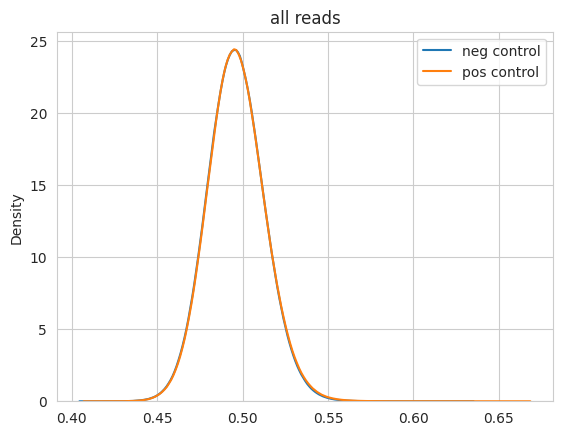

In [281]:
sns.kdeplot(neg_pred, label= "neg control")
sns.kdeplot(pos_pred, label= "pos control")
plt.legend()
plt.title("all reads")
outfig = '../results/figures/addseq_predicted_prob_density_all.pdf'
plt.savefig(outfig)

In [279]:
# Compute summary performance statistics

correct = {0: 0, 1: 0}
total = {0: 0, 1: 0}

for seq_id in tqdm(seq_preds):
    label = seq_id[0]
    pred_arr = np.round(np.array(seq_preds[seq_id]))
    if label == 0:
        label_arr = np.zeros(len(pred_arr))
    else:
        label_arr = np.ones(len(pred_arr))
    correct_arr = (pred_arr == label_arr)
    correct[label] += np.sum(correct_arr)
    total[label] += len(pred_arr)

accuracy = (correct[0] + correct[1]) / float(total[0] + total[1])  

true_negatives = correct[0]
true_positives = correct[1]
false_negatives = total[1] - correct[1]
false_positives = total[0] - correct[0]

precision = true_positives / float(true_positives + false_positives)
recall = true_positives / float(true_positives + false_negatives)

print("True negatives:", true_negatives)
print("True positives:", true_positives)
print("False negatives:", false_negatives)
print("False positives:", false_positives)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

100%|████████████████████████████████████████| 740/740 [00:03<00:00, 242.99it/s]

True negatives: 9997366
True positives: 7068265
False negatives: 10532368
False positives: 6606607
Accuracy: 0.4989278636918081
Precision: 0.5168797923666123
Recall: 0.401591522304908
